# Credit Risk Analysis in Polish Region (2020–2023)

## Project Goal  
The goal of this analysis is to assess credit risk across the 16 region (regions) of Poland from 2020 to 2023 using selected socio-economic indicators. By analyzing the data, we aim to identify regions with elevated credit risk and determine which demographic and economic factors have the greatest impact on it.

## Scope of Analysis  
The analysis includes the following variables:

- **Disposable income per capita** – a measure of household wealth.  
- **Unemployment rate** – an indicator of financial stability.  
- **Population size** – for demographic context.  
- **Median age** – approximating the age structure of the population.  
- **Population density** – living conditions proxy.  
- **Share of working-age population (%)** – reflects income-generating capacity of the region.

## Methodology
Data was retrieved from the Central Statistical Office of Poland (GUS) and processed in BigQuery. The analysis in this notebook includes:
- Exploratory Data Analysis (EDA)  
- Construction of a credit risk index  
- Comparative visualizations between region  
- Interpretation of results

## Time Frame 
- Year 2020  
- Year 2021  
- Year 2022  
- Year 2023

## Hypothesis
Regions with lower income, higher unemployment, and a smaller share of working-age population exhibit higher credit risk.

In [40]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

# Loading previously cleaned CSV files
income = pd.read_csv("income_per_capita_clean.csv")
unemployment = pd.read_csv("unemployment_rate_by_region_clean.csv")
population = pd.read_csv("population_by_region_clean.csv")
median_age = pd.read_csv("median_age_by_region_clean.csv")
density = pd.read_csv("population_density_by_region_clean.csv")
working_age = pd.read_csv("working_age_population_share_clean.csv")

# Checking first few rows of income to confirm if it is loaded correctly
income.head()

,Code;Province;2020;2021;2022;2023
0,0200000;DOLNOSLASKIE;2031.24;2213.37;2292.76;2...
1,0400000;KUJAWSKO-POMORSKIE;1845.34;1932.22;214...
2,0600000;LUBELSKIE;1679.02;1906.84;2088.43;2461.44
3,0800000;LUBUSKIE;1971.47;2126.85;2252;2745.66
4,1000000;LODZKIE;1871.83;2086.29;2281.35;2555.46


In [41]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

# Basic plot style
plt.style.use("bmh")

# Load CSV files with semicolon separator
income = pd.read_csv("income_per_capita_clean.csv", sep=";")
unemployment = pd.read_csv("unemployment_rate_by_region_clean.csv", sep=";")
population = pd.read_csv("population_by_region_clean.csv", sep=";")
median_age = pd.read_csv("median_age_by_region_clean.csv", sep=";")
density = pd.read_csv("population_density_by_region_clean.csv", sep=";")
working_age = pd.read_csv("working_age_population_share_clean.csv", sep=";")

# Check column names for each dataset
print("Income columns:", income.columns)
print("Unemployment columns:", unemployment.columns)
print("Population columns:", population.columns)
print("Median age columns:", median_age.columns)
print("Density columns:", density.columns)
print("Working age columns:", working_age.columns)

Income columns: Index(['Code', 'Province', '2020', '2021', '2022', '2023'], dtype='object')
Unemployment columns: Index(['Code', 'Province', '2020', '2021', '2022', '2023'], dtype='object')
Population columns: Index(['Code', 'Province', '2020', '2021', '2022', '2023'], dtype='object')
Median age columns: Index(['Code', 'Province', '2020', '2021', '2022', '2023'], dtype='object')
Density columns: Index(['Code', 'Province', '2020', '2021', '2022', '2023'], dtype='object')
Working age columns: Index(['Code', 'Province', '2020', '2021', '2022', '2023'], dtype='object')


In [42]:
# Standardize the column name 'Province' to 'Region'
for df in [income, unemployment, population, median_age, density, working_age]:
    df.rename(columns={'Province': 'Region'}, inplace=True)

# Convert year columns to numeric
year_cols = ['2020', '2021', '2022', '2023']
for df in [income, unemployment, population, median_age, density, working_age]:
    df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce')

# Preview updated income DataFrame
income.head()

,Code,Region,2020,2021,2022,2023
0,200000,DOLNOSLASKIE,2031.24,2213.37,2292.76,2739.90
1,400000,KUJAWSKO-POMORSKIE,1845.34,1932.22,2140.49,2534.15
2,600000,LUBELSKIE,1679.02,1906.84,2088.43,2461.44
3,800000,LUBUSKIE,1971.47,2126.85,2252.00,2745.66
4,1000000,LODZKIE,1871.83,2086.29,2281.35,2555.46


### Step 1: Credit Risk Index

To estimate the credit risk in each voivodeship, I create a synthetic index based on three socio-economic indicators that are likely to influence loan repayment capacity:

1. **Unemployment rate** - high unemployment means higher credit risk.
2. **Disposable income per capita** - lower income increases the risk.
3. **Share of working-age population** - a lower share means fewer economically active people, thus higher risk.

#### Normalization

Since each indicator has different units and scales, we need to bring them to a common scale using **min-max normalization**:
normalized_value = (x - min(x)) / (max(x) - min(x))

This rescaling transforms all values to a [0, 1] range.

#### Index Formula

To compute the final Credit Risk Index, I calculate a weighted average of the normalized indicators:
Credit Risk Index = (1/3) * normalized_unemployment + (1/3) * (1 - normalized_income) + (1/3) * (1 - normalized_working_age_share)

In [8]:
# Calculating normalized indicators for 2023

def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalizing unemployment rate 
unemp_norm = normalize(unemployment['2023'])

# Normalizing income
income_norm = 1 - normalize(income['2023'])

# Normalizing working age population share 
workage_norm = 1 - normalize(working_age['2023'])

# Calculating Credit Risk Index as equal weighted average
credit_risk_index = (unemp_norm + income_norm + workage_norm) / 3

# Putting results in a DataFrame with region names
credit_risk_df = pd.DataFrame({
    'Region': income['Region'],  
    'Credit Risk Index 2023': credit_risk_index
})

# Showing top regions with highest risk
credit_risk_df.sort_values(by='Credit Risk Index 2023', ascending=False).reset_index(drop=True)

,Region,Credit Risk Index 2023
0,SWIETOKRZYSKIE,0.870098
1,LUBELSKIE,0.759739
2,LODZKIE,0.708424
3,PODKARPACKIE,0.694444
4,WARMINSKO-MAZURSKIE,0.673775
5,KUJAWSKO-POMORSKIE,0.634938
6,PODLASKIE,0.548494
7,ZACHODNIOPOMORSKIE,0.543543
8,POMORSKIE,0.506337
9,LUBUSKIE,0.409112


### Note on Missing Data for Opolskie

The missing value (NaN) for the Opolskie region in the Credit Risk Index is due to the lack of available data in the official government datasets for one or more of the indicators used in this analysis. This is a known limitation of the source data and should be taken into account when interpreting the results.


Not in GeoDataFrame: ['LODZKIE', 'MALOPOLSKIE']
Not in credit_risk_df: ['MAOPOLSKIE', 'ODZKIE']


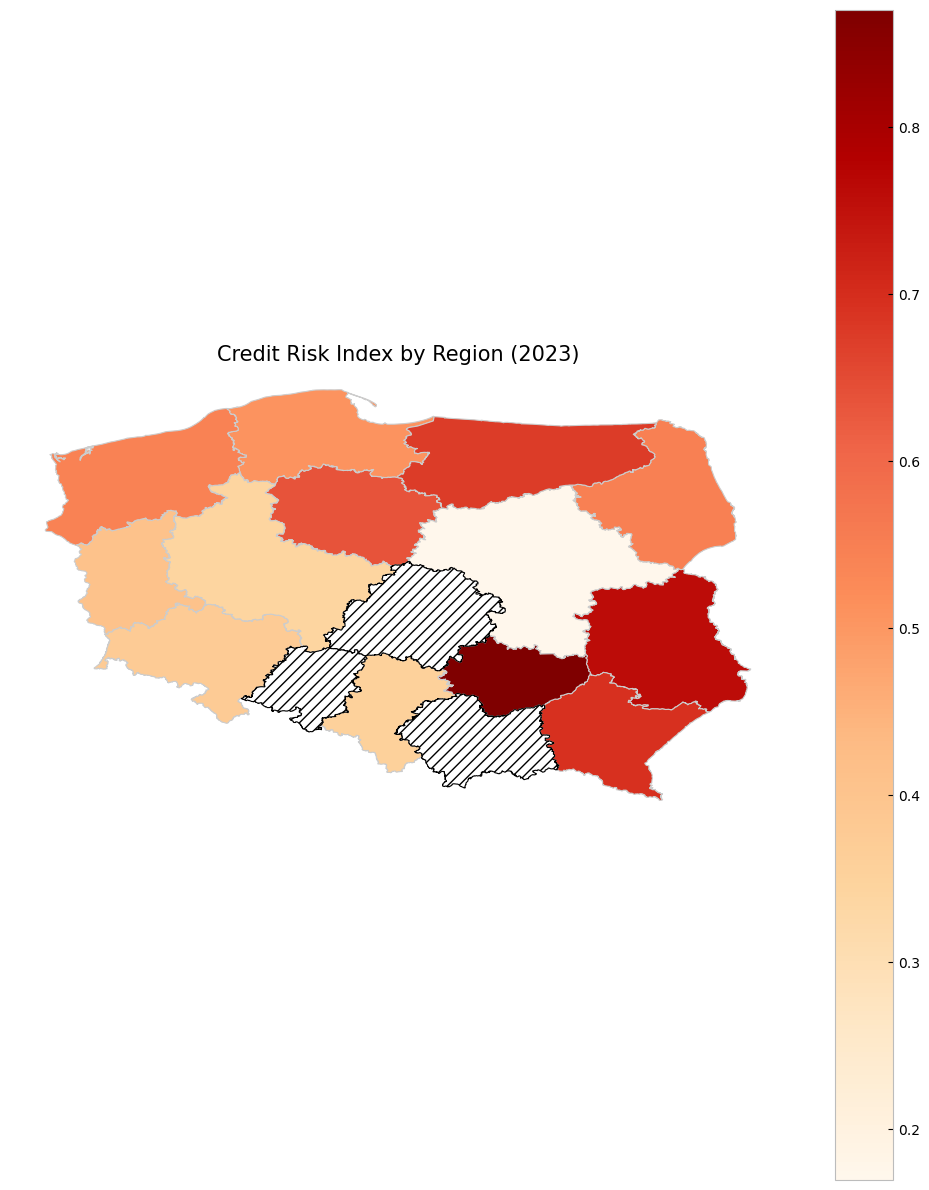

In [40]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import MultiPolygon, Polygon
import unicodedata
import re

# Cleaning names – remove diacritics, whitespace, special characters
def clean_text(text):
    if pd.isna(text):
        return ""
    normalized = unicodedata.normalize('NFKD', str(text))
    no_diacritics = ''.join(c for c in normalized if not unicodedata.combining(c))
    ascii_only = re.sub(r'[^A-Z]', '', no_diacritics.upper())
    return ascii_only

# Load voivodeship geometry from GeoJSON
gdf = gpd.read_file("gadm41_POL_1.json")
gdf['NAME_1'] = gdf['NAME_1'].apply(clean_text)

# Clean region names in credit risk dataset
credit_risk_df['Region'] = credit_risk_df['Region'].apply(clean_text)

# Fixing typos in region names (e.g. 'ODZKIE' -> 'LODZKIE')
fix_typos = {
    'ODZKIE': 'LODZKIE',
    'MAOPOLSKIE': 'MALOPOLSKIE'
}
credit_risk_df['Region'] = credit_risk_df['Region'].replace(fix_typos)

# Debugging mismatches (optional)
geo_names = set(gdf['NAME_1'].unique())
risk_names = set(credit_risk_df['Region'].unique())
print("Not in GeoDataFrame:", sorted(risk_names - geo_names))
print("Not in credit_risk_df:", sorted(geo_names - risk_names))

# Merge map with data using cleaned region names
merged = gdf.merge(credit_risk_df, left_on='NAME_1', right_on='Region', how='left')
merged = gpd.GeoDataFrame(merged, geometry='geometry')

# Ensure geometry is valid (convert Polygon to MultiPolygon if needed)
def to_multipolygon(geom):
    if isinstance(geom, Polygon):
        return MultiPolygon([geom])
    return geom

merged.geometry = merged.geometry.apply(to_multipolygon)
merged = merged[merged.geometry.notnull()]

# Plotting map
fig, ax = plt.subplots(1, 1, figsize=(10, 12))

merged.plot(
    column='Credit Risk Index 2023',
    cmap='OrRd',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    ax=ax,
    missing_kwds={
        "color": "white",         # Color for regions with no data
        "edgecolor": "black",     # Border color for missing
        "hatch": "///",           # Hatch pattern for missing
        "label": "No data"        # Legend label
    }
)

# Final plot formatting
ax.set_title("Credit Risk Index by Region (2023)", fontsize=15)
ax.axis('off')
ax.set_aspect('equal')
plt.tight_layout()
plt.show()

In [39]:
print(credit_risk_df[['Region', 'Credit Risk Index 2023']])
print(sorted(gdf['NAME_1'].unique()))

                Region  Credit Risk Index 2023
0         DOLNOSLASKIE                0.375363
1    KUJAWSKOPOMORSKIE                0.634938
2            LUBELSKIE                0.759739
3             LUBUSKIE                0.409112
4              LODZKIE                0.708424
5          MALOPOLSKIE                0.220693
6          MAZOWIECKIE                0.169591
7             OPOLSKIE                     NaN
8         PODKARPACKIE                0.694444
9            PODLASKIE                0.548494
10           POMORSKIE                0.506337
11             SLASKIE                0.357266
12      SWIETOKRZYSKIE                0.870098
13  WARMINSKOMAZURSKIE                0.673775
14       WIELKOPOLSKIE                0.339783
15  ZACHODNIOPOMORSKIE                0.543543
['DOLNOSLASKIE', 'KUJAWSKOPOMORSKIE', 'LUBELSKIE', 'LUBUSKIE', 'MAOPOLSKIE', 'MAZOWIECKIE', 'ODZKIE', 'OPOLSKIE', 'PODKARPACKIE', 'PODLASKIE', 'POMORSKIE', 'SLASKIE', 'SWIETOKRZYSKIE', 'WARMINSKOMAZURS

### Note on Data Cleaning: 
Manual Fix of Region Names During the process of merging socio-economic indicators (credit_risk_df) with the voivodeship map data from the GeoJSON file, two regions failed to appear correctly on the map. The issue was caused by special Polish characters in region names (specifically the letter ł) in the GeoJSON file.

**Problem:** Although region names appeared correct in both datasets, automatic normalization failed to produce matching names for:

'ŁÓDZKIE'

'MAŁOPOLSKIE'

After removing diacritics, the names became:

'ODZKIE' (instead of 'LODZKIE')

'MAOPOLSKIE' (instead of 'MALOPOLSKIE')

These transformed versions did not match the credit_risk_df, which already contained properly normalized ASCII names.

**Solution:** To resolve the issue, the GeoJSON file was manually edited, and all Polish diacritics were removed directly in the "NAME_1" fields.

This approach ensured that all region names in the map file matched the names used in the data, allowing for a successful merge.

**Outcome:** After the manual correction, the merged GeoDataFrame contained valid entries for all 16 region, and the map correctly visualized the Credit Risk Index 2023 for each region — including previously missing Łódzkie and Małopolskie.

Not in GeoDataFrame: []
Not in credit_risk_df: []


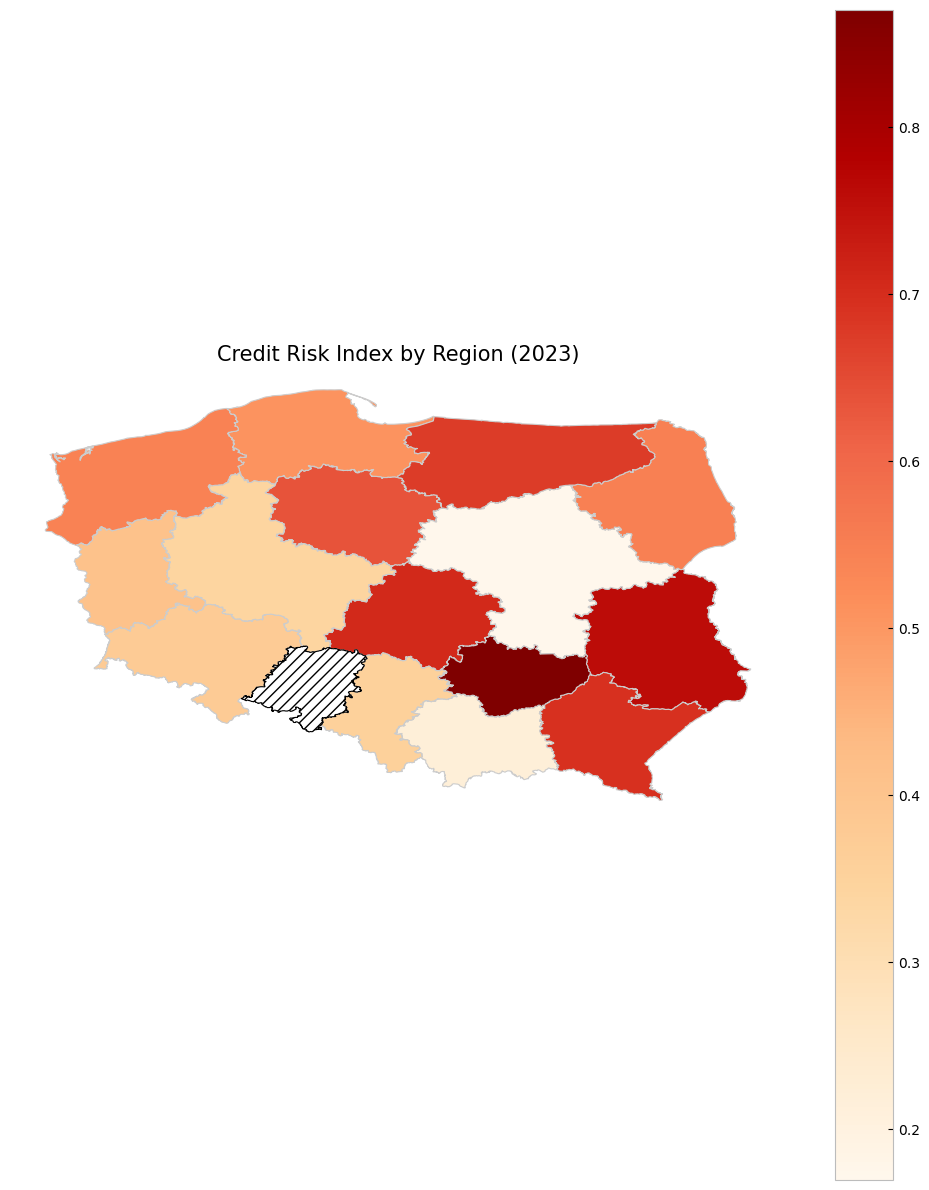

In [42]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import MultiPolygon, Polygon
import unicodedata
import re

# Function to clean and normalize voivodeship names
def clean_text(text):
    if pd.isna(text):
        return ""
    # Replace special cases manually
    text = str(text).replace("Ł", "L").replace("ł", "l")
    # Normalize Unicode, remove diacritics
    normalized = unicodedata.normalize('NFKD', text)
    no_diacritics = ''.join(c for c in normalized if not unicodedata.combining(c))
    # Keep only uppercase A-Z
    ascii_only = re.sub(r'[^A-Z]', '', no_diacritics.upper())
    return ascii_only

# Loading map data
gdf = gpd.read_file("gadm41_POL_1.json")
gdf['NAME_1'] = gdf['NAME_1'].apply(clean_text)

# Clean dataset column with regions ---
credit_risk_df['Region'] = credit_risk_df['Region'].apply(clean_text)

# Debuging mismatches
geo_names = set(gdf['NAME_1'].unique())
risk_names = set(credit_risk_df['Region'].unique())
print("Not in GeoDataFrame:", sorted(risk_names - geo_names))
print("Not in credit_risk_df:", sorted(geo_names - risk_names))

# Merging both datasets
merged = gdf.merge(credit_risk_df, left_on='NAME_1', right_on='Region', how='left')
merged = gpd.GeoDataFrame(merged, geometry='geometry')

# Ensuring all geometries are MultiPolygons
def to_multipolygon(geom):
    if isinstance(geom, Polygon):
        return MultiPolygon([geom])
    return geom

merged.geometry = merged.geometry.apply(to_multipolygon)
merged = merged[merged.geometry.notnull()]

# Ploting map
fig, ax = plt.subplots(1, 1, figsize=(10, 12))

merged.plot(
    column='Credit Risk Index 2023',
    cmap='OrRd',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    ax=ax,
    missing_kwds={
        "color": "white",         # White fill for missing data
        "edgecolor": "black",     # Border for missing data
        "hatch": "///",           # Hatch style
        "label": "No data"        # Legend label
    }
)

ax.set_title("Credit Risk Index by Region (2023)", fontsize=15)
ax.axis('off')                  # Remove axes
ax.set_aspect('equal')          # Keep proportions
plt.tight_layout()
plt.show()

### Exploratory Data Analysis (EDA)
Having visualized the spatial distribution of the Credit Risk Index (2023) across Polish region, we now proceed to explore the underlying socio-economic factors that may influence regional credit risk.

**Goal:**
Identify potential relationships between credit risk and selected indicators such as:
- Disposable income per capita
- Unemployment rate
- Median age
- Population size
- Population density
- Working-age population share (%)

**Key Questions:**
- Do regions with higher unemployment also show higher credit risk?
- Is there a correlation between median age and credit risk?
- Does population density influence financial stability?

**What’s next:**
- Visualize distributions of each variable.
- Compare region based on multiple metrics.
- Analyze correlations between indicators and the credit risk index.
- Identify potential clusters or patterns.

We'll begin with summary statistics and variable distributions in the next step.

In [47]:
# Converting each dataset from wide format (years as columns) to long format
income_long = income.melt(id_vars='Region', var_name='Year', value_name='Income')
unemp_long = unemployment.melt(id_vars='Region', var_name='Year', value_name='Unemployment')
workage_long = working_age.melt(id_vars='Region', var_name='Year', value_name='WorkingAgeShare')

In [44]:
# Merging the 3 long-format datasets on Region and Year
merged_long = income_long.merge(unemp_long, on=['Region', 'Year'])
merged_long = merged_long.merge(workage_long, on=['Region', 'Year'])

# Preview of merged dataset
merged_long.head()

,Region,Year,Income,Unemployment,WorkingAgeShare
0,DOLNOSLASKIE,Code,200000.0,200000.0,200000.0
1,KUJAWSKO-POMORSKIE,Code,400000.0,400000.0,400000.0
2,LUBELSKIE,Code,600000.0,600000.0,600000.0
3,LUBUSKIE,Code,800000.0,800000.0,800000.0
4,LODZKIE,Code,1000000.0,1000000.0,1000000.0


In [45]:
from sklearn.preprocessing import MinMaxScaler

# Initializing scaler
scaler = MinMaxScaler()

# Normalizing all three variables across the entire dataset
merged_long[['Income_norm', 'Unemp_norm', 'WorkingAgeShare_norm']] = scaler.fit_transform(
    merged_long[['Income', 'Unemployment', 'WorkingAgeShare']]
)

# Calculating the Credit Risk Index using the defined formula
merged_long['CreditRiskIndex'] = (
    (1/3) * merged_long['Unemp_norm'] +
    (1/3) * (1 - merged_long['Income_norm']) +
    (1/3) * (1 - merged_long['WorkingAgeShare_norm'])
)

# Checking first few rows
merged_long.head()

,Region,Year,Income,Unemployment,WorkingAgeShare,Income_norm,Unemp_norm,WorkingAgeShare_norm,CreditRiskIndex
0,DOLNOSLASKIE,Code,200000.0,200000.0,200000.0,0.062034,0.062499,0.062483,0.645994
1,KUJAWSKO-POMORSKIE,Code,400000.0,400000.0,400000.0,0.124565,0.124999,0.124984,0.625150
2,LUBELSKIE,Code,600000.0,600000.0,600000.0,0.187096,0.187499,0.187486,0.604306
3,LUBUSKIE,Code,800000.0,800000.0,800000.0,0.249627,0.249999,0.249987,0.583462
4,LODZKIE,Code,1000000.0,1000000.0,1000000.0,0.312159,0.312499,0.312488,0.562618


In [46]:
# Pivot table: years become columns again
risk_wide = merged_long.pivot(index='Region', columns='Year', values='CreditRiskIndex')

# Adding column for difference between 2023 and 2020
risk_wide['Change_2023_vs_2020'] = risk_wide['2023'] - risk_wide['2020']

# Sorting by change
risk_wide_sorted = risk_wide.sort_values(by='Change_2023_vs_2020', ascending=False)

# Displaying the result
risk_wide_sorted

Year,2020,2021,2022,2023,Code,Change_2023_vs_2020
Region,,,,,,
POMORSKIE,0.666645,0.666641,0.666622,0.666593,0.437553,-0.000051
WARMINSKO-MAZURSKIE,0.666636,0.666617,0.666614,0.666580,0.375021,-0.000057
LODZKIE,0.666637,0.666615,0.666595,0.666566,0.562618,-0.000071
KUJAWSKO-POMORSKIE,0.666640,0.666631,0.666609,0.666568,0.625150,-0.000072
SWIETOKRZYSKIE,0.666653,0.666638,0.666626,0.666581,0.395865,-0.000072
PODKARPACKIE,0.666667,0.666655,0.666642,0.666595,0.479242,-0.000072
WIELKOPOLSKIE,0.666646,0.666636,0.666616,0.666572,0.354177,-0.000074
DOLNOSLASKIE,0.666621,0.666602,0.666593,0.666547,0.645994,-0.000074
PODLASKIE,0.666629,0.666624,0.666587,0.666553,0.458398,-0.000076


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading all cleaned CSVs (with correct separator)
income = pd.read_csv("income_per_capita_clean.csv", sep=";")
unemployment = pd.read_csv("unemployment_rate_by_region_clean.csv", sep=";")
population = pd.read_csv("population_by_region_clean.csv", sep=";")
median_age = pd.read_csv("median_age_by_region_clean.csv", sep=";")
density = pd.read_csv("population_density_by_region_clean.csv", sep=";")
working_age = pd.read_csv("working_age_population_share_clean.csv", sep=";")

# Renaming columns for consistency
for df in [income, unemployment, population, median_age, density, working_age]:
    df.rename(columns={'Province': 'Region'}, inplace=True)

# Converting year columns to numeric
year_cols = ['2020', '2021', '2022', '2023']
for df in [income, unemployment, population, median_age, density, working_age]:
    df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce')

# Normalizing values for 2023
income_norm = income['2023'].rank(ascending=False) / len(income)
unemp_norm = unemployment['2023'].rank() / len(unemployment)
working_age_norm = (1 - working_age['2023']/100).rank() / len(working_age)

# Calculating final Credit Risk Index
credit_risk_index = (unemp_norm + (1 - income_norm) + working_age_norm) / 3

# Creating final DataFrame
credit_risk_df = pd.DataFrame({
    'Region': income['Region'],
    'Credit Risk Index 2023': credit_risk_index
})

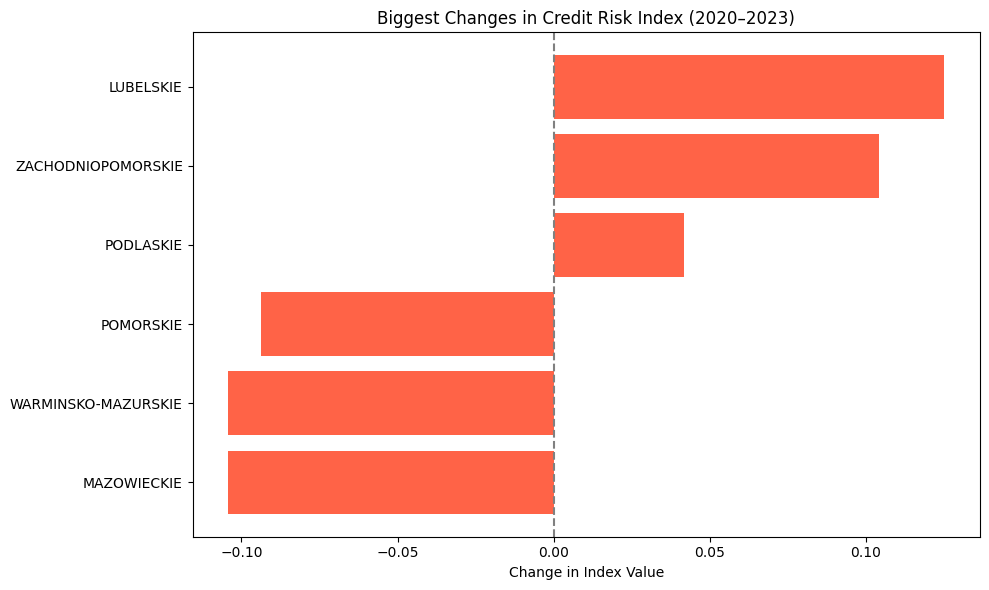

In [8]:
# Calculating Credit Risk Index for 2020
income_norm_2020 = income['2020'].rank(ascending=False) / len(income)
unemp_norm_2020 = unemployment['2020'].rank() / len(unemployment)
working_age_norm_2020 = (1 - working_age['2020'] / 100).rank() / len(working_age)

credit_risk_2020 = (unemp_norm_2020 + (1 - income_norm_2020) + working_age_norm_2020) / 3

# Adding both years to the DataFrame
credit_risk_df['Credit Risk Index 2020'] = credit_risk_2020

# Calculating change in risk
credit_risk_df['Change in Risk'] = credit_risk_df['Credit Risk Index 2023'] - credit_risk_df['Credit Risk Index 2020']

# Sorting by absolute change and pick top 3 increases and decreases
top_increase = credit_risk_df.sort_values('Change in Risk', ascending=False).head(3)
top_decrease = credit_risk_df.sort_values('Change in Risk').head(3)

# Combining
highlight = pd.concat([top_increase, top_decrease])

# Ploting
fig, ax = plt.subplots(figsize=(10, 6))
highlight.sort_values('Change in Risk', inplace=True)
ax.barh(highlight['Region'], highlight['Change in Risk'], color='tomato')
ax.axvline(0, color='gray', linestyle='--')
ax.set_title('Biggest Changes in Credit Risk Index (2020–2023)')
ax.set_xlabel('Change in Index Value')
plt.tight_layout()
plt.show()

### Change in Credit Risk (2020–2023)

The bar chart below highlights the regions that experienced the biggest change in the Credit Risk Index between 2020 and 2023.

- Positive values indicate an increase in risk (worsening conditions),
- Negative values indicate a decrease in risk (improving conditions).

From the chart, we can see that:
- Lubelskie, Zachodniopomorskie, and Podlaskie saw the **largest increase** in credit risk.
- Meanwhile, Mazowieckie, Warmińsko-Mazurskie, and Pomorskie experienced the **most significant improvement**.

It may be insightful to explore which specific variables (income, unemployment, working-age share) contributed to these changes.

In [10]:
# Creating a DataFrame with 2023 values for all variables
df_corr = pd.DataFrame({
    'Region': income['Region'],
    'Income per Capita': income['2023'],
    'Unemployment Rate': unemployment['2023'],
    'Working Age Share': working_age['2023'],
    'Credit Risk Index 2023': credit_risk_df['Credit Risk Index 2023']
})

# Calculating correlation matrix (excluding the Region column)
correlations = df_corr.drop(columns='Region').corr()

# Displaying correlation values with respect to Credit Risk Index
print(correlations['Credit Risk Index 2023'])

Income per Capita         0.249336
Unemployment Rate         0.397788
Working Age Share        -0.768770
Credit Risk Index 2023    1.000000
Name: Credit Risk Index 2023, dtype: float64


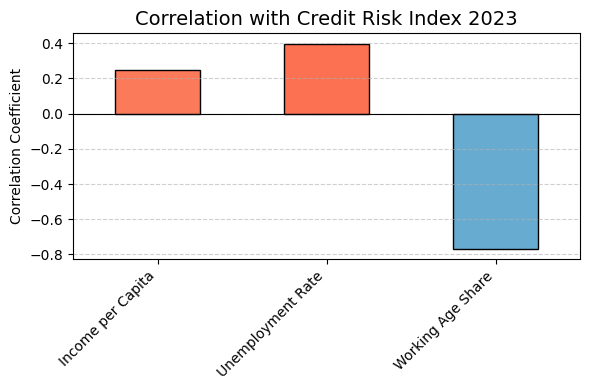

In [38]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np

# Get correlations (excluding self)
correlations_plot = correlations['Credit Risk Index 2023'].drop('Credit Risk Index 2023').astype(float)

# Normalize directly in range [-2, 3]
vmin, vmax = -2, 3
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# Custom colormap: blend blue (negatives) and red (positives)
colors = [
    cm.RdBu_r(norm(val)) if val < 0 else cm.Reds(norm(val))
    for val in correlations_plot
]

# Plot
plt.figure(figsize=(6, 4))
correlations_plot.plot(kind='bar', color=colors, edgecolor='black')

plt.title('Correlation with Credit Risk Index 2023', fontsize=14)
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Correlation Analysis with Credit Risk Index 2023

The bar chart above shows the correlation between key demographic and economic variables and the Credit Risk Index in 2023.

- **Unemployment Rate** has the strongest **positive** correlation (~0.4), indicating that regions with higher unemployment tend to have higher credit risk.
- **Income per Capita** shows a weaker but still positive correlation (~0.25), suggesting that lower income is mildly associated with increased credit risk.
- **Working Age Share** demonstrates a strong negative correlation (~-0.75), meaning that regions with a lower proportion of working-age population tend to have a **higher** Credit Risk Index.

### Final Summary
In this project, I analyzed how credit risk levels changed across Polish regions between 2020 and 2023, using publicly available data.

To do this, I built a Credit Risk Index, based on three key indicators:
- Unemployment Rate
- Income per Capita
- Share of Working-Age Population

After calculating the index for each region, I visualized the changes and explored which regions saw the biggest increase or decrease in risk.

What I found:
- The regions where credit risk increased the most were Lubelskie, Zachodniopomorskie, and Podlaskie.
- The biggest improvements were seen in Mazowieckie, Warmińsko-Mazurskie, and Pomorskie.
- Out of all variables, the Working Age Share had the strongest impact — regions with fewer working-age people had much higher credit risk.

Finally, I used heatmaps and bar plots to show how each variable correlated with credit risk. These visualizations helped clarify how strongly each factor contributed to the final index.